#**CROP DISEASE DETECTION**

In [41]:
%cd /content/

/content


##Libraries Used

In [18]:
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import shutil
import numpy as np
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

##Dataset

In [19]:
#train_dir ="drive/My Drive/ML/PlantVillage_Dataset/Output/train/"
train_dir ="drive/My Drive/ML/PlantVillage_Dataset/output/train/"
test_dir="drive/My Drive/ML/PlantVillage_Dataset/output/test/"

##Helper Functions

In [20]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count  

In [21]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

17 Classes
13503 Train images
1800 Test images


##Pre-processing data

In [47]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [77]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =64

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 13503 images belonging to 17 classes.
Found 1800 images belonging to 18 classes.


In [61]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Corn_(maize)___Common_rust_': 4,
 'Corn_(maize)___Northern_Leaf_Blight': 5,
 'Corn_(maize)___healthy': 6,
 'Grape___Esca_(Black_Measles)': 7,
 'Potato___Early_blight': 8,
 'Potato___healthy': 9,
 'Tomato___Bacterial_spot': 10,
 'Tomato___Late_blight': 11,
 'Tomato___Leaf_Mold': 12,
 'Tomato___Spider_mites Two-spotted_spider_mite': 13,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 14,
 'Tomato___Tomato_mosaic_virus': 15,
 'Tomato___healthy': 16}

##CNN

In [62]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 84, 84, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 41, 41, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 19, 19, 64)      

In [63]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_9', 'max_pooling2d_9', 'conv2d_10', 'max_pooling2d_10', 'conv2d_11', 'max_pooling2d_11', 'flatten_3', 'dense_9', 'dropout_3', 'dense_10', 'dense_11']


In [34]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from keras.preprocessing import image
from PIL import Image
import sys
sys.modules['Image']=Image

img1 = image.load_img('/content/drive/MyDrive/ML/PlantVillage_Dataset/output/train/Tomato___Late_blight/af7021ea-5138-4b6f-9ee5-c05daf993791___GHLB2 Leaf 77.1_final_masked.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [65]:
from keras.models import Model

conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_9').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_9').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_10').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_10').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_11').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_11').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_3').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

##Visualization after every layer

###Layer1

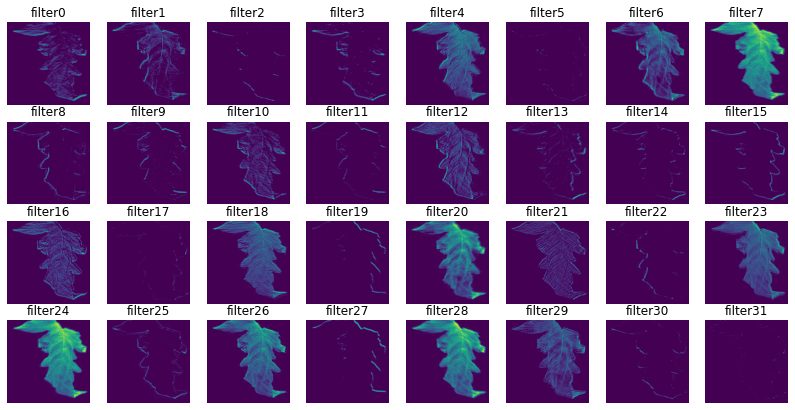

In [66]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

###Layer2

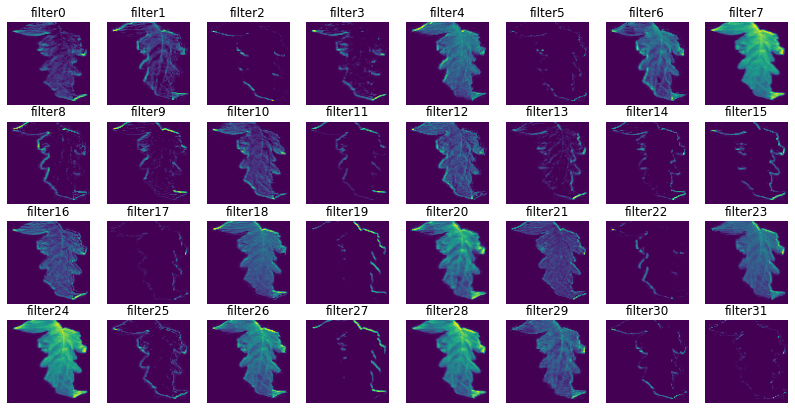

In [67]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

###Layer3

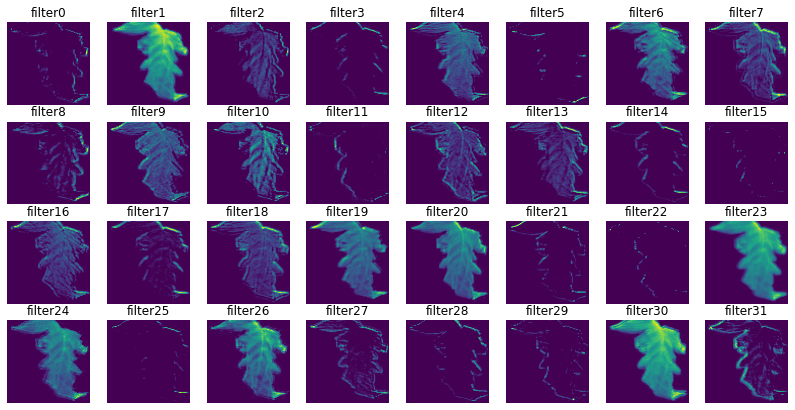

In [68]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

###Layer4

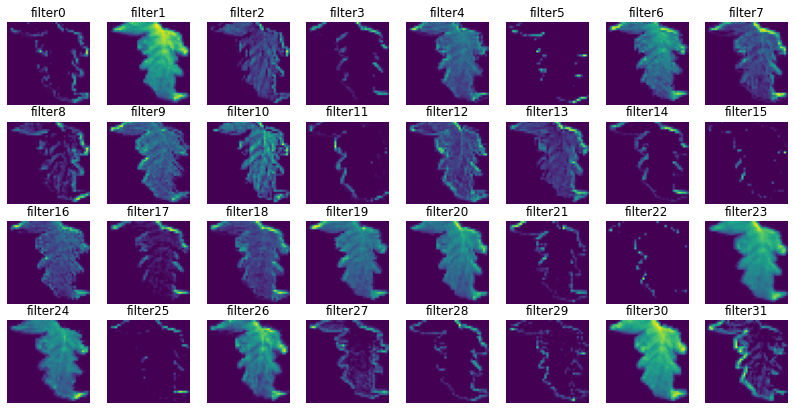

In [69]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

###Layer5

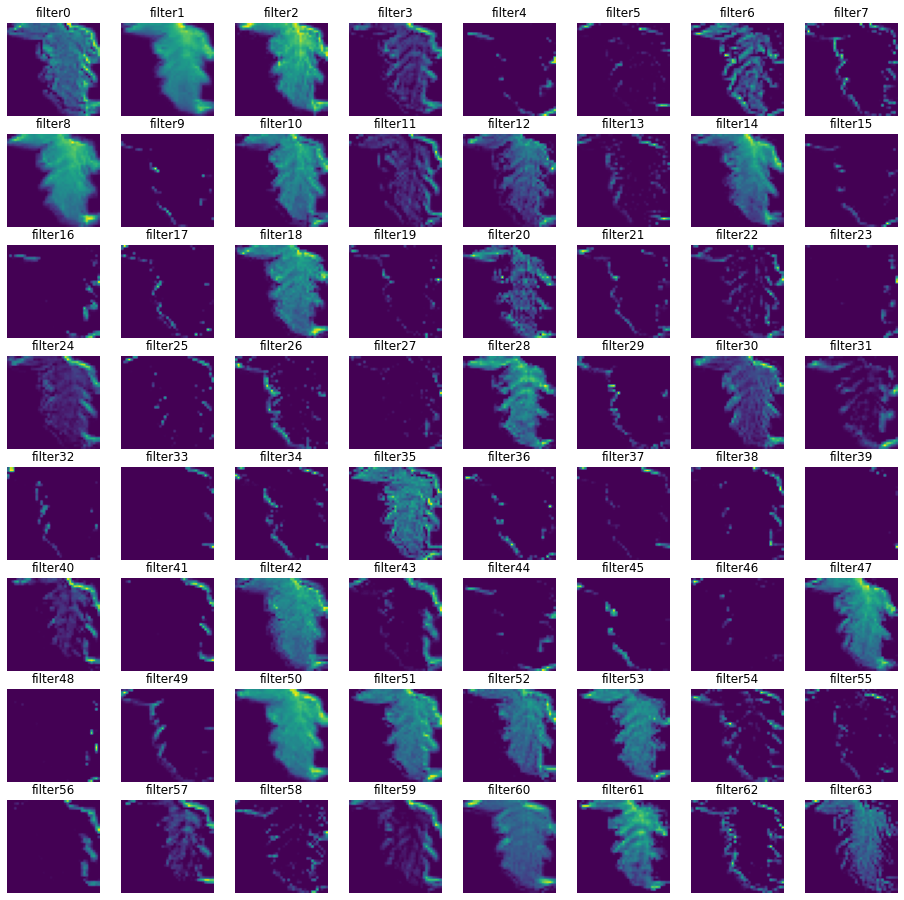

In [70]:
fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

###Layer6

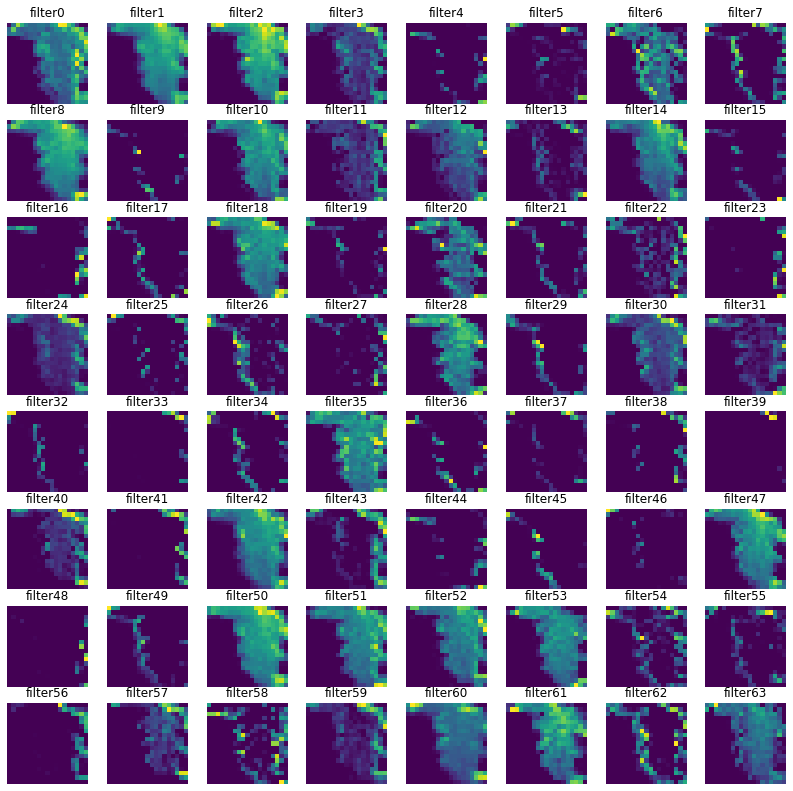

In [71]:
fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

##Model Training

In [51]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 13503 images belonging to 17 classes.


In [52]:
# Model building to get trained with parameters.
import tensorflow as tf 
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=5,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)

Epoch 1/5
210/210 [==============================] - 1346s 6s/step - loss: 1.6551 - accuracy: 0.4654 - val_loss: 0.9997 - val_accuracy: 0.6675
Epoch 2/5
210/210 [==============================] - 172s 822ms/step - loss: 0.8979 - accuracy: 0.7062 - val_loss: 0.7699 - val_accuracy: 0.7462
Epoch 3/5
210/210 [==============================] - 172s 820ms/step - loss: 0.6774 - accuracy: 0.7797 - val_loss: 0.5289 - val_accuracy: 0.8266
Epoch 4/5
210/210 [==============================] - 169s 805ms/step - loss: 0.5536 - accuracy: 0.8198 - val_loss: 0.4908 - val_accuracy: 0.8376
Epoch 5/5
210/210 [==============================] - 174s 827ms/step - loss: 0.4912 - accuracy: 0.8388 - val_loss: 0.4072 - val_accuracy: 0.8623


##Accuracy and Losses

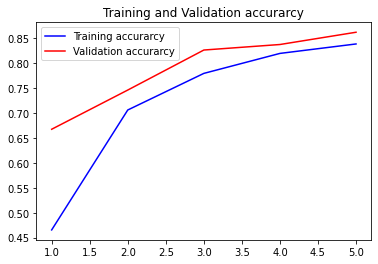

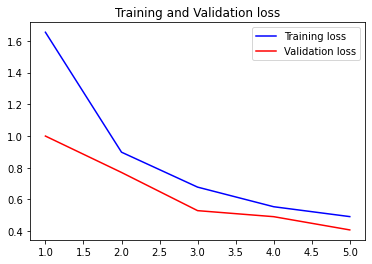

In [75]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

##Predictions

In [81]:
from keras.models import load_model
model.save('crop.h5')

from keras.models import load_model
model.save_weights('crop_weights.h5')

In [104]:
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy"]

Tomato___Late_blight


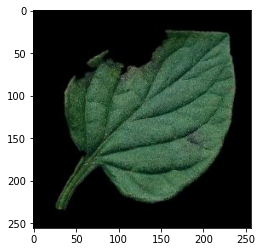

In [106]:
from keras.preprocessing import image
from keras.models import Sequential

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/ML/PlantVillage_Dataset/output/train/Tomato___Late_blight/afb65a40-7512-4d2c-884e-56e6c5010511___RS_Late.B 5380_final_masked.jpg')])
disease=image.load_img('/content/drive/MyDrive/ML/PlantVillage_Dataset/output/train/Tomato___Late_blight/afb65a40-7512-4d2c-884e-56e6c5010511___RS_Late.B 5380_final_masked.jpg')
plt.imshow(disease)
print(Classes[np.argmax(result)])